In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Config

In [2]:
#directory = '/data/project/general/aerosolretriev/aerosol_results_25_08_2022/forward_model/version4'
#directory = '/data/project/general/aerosolretriev/aerosol_results_august_2022/forward_model'
#directory = '/data/project/general/aerosolretriev/aerosol_results_25_08_2022/forward_model2'
#directory = '/data/project/general/aerosolretriev/aerosol_results_ds08/aerosol_results_11_09_2022/forward_model1'

directory = '/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11'

#directory = '/data/project/general/aerosolretriev/aerosol_results_september_2022/forward_model4'

#directory = '/data/project/general/aerosolretriev/aerosol_results_september_2022/forward_model_ASHA/forward_model3'

In [3]:

plot_dir = directory+'/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [4]:
result_dir = directory 


In [5]:
model_dir =  directory + '/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [6]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11/models'

# Load data

In [7]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [8]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [9]:
df['config/datafile'].loc[0]

'/data/project/general/aerosolretriev/aerosol_data/dataset_12_2022/preprocessed_new/data_all_train_iv5_F11.h5'

In [10]:
df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

# Plot

## Generalisation of adjusted $R^2$

In [11]:
r2_val = 'r2_sklearn_val'
r2_train = 'r2_sklearn_train'

r2_val = 'r2_val'
r2_train = 'r2_train'

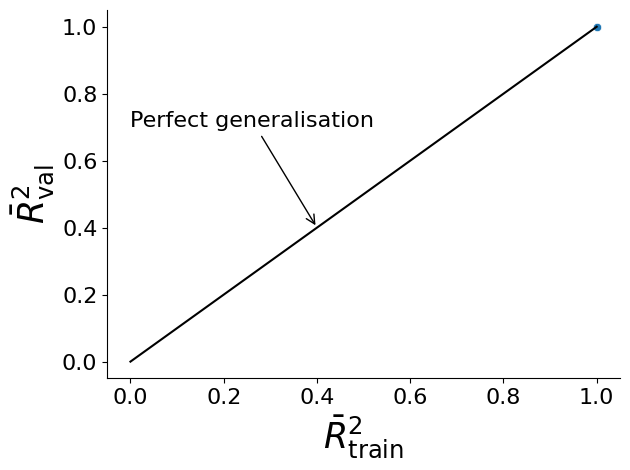

In [12]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

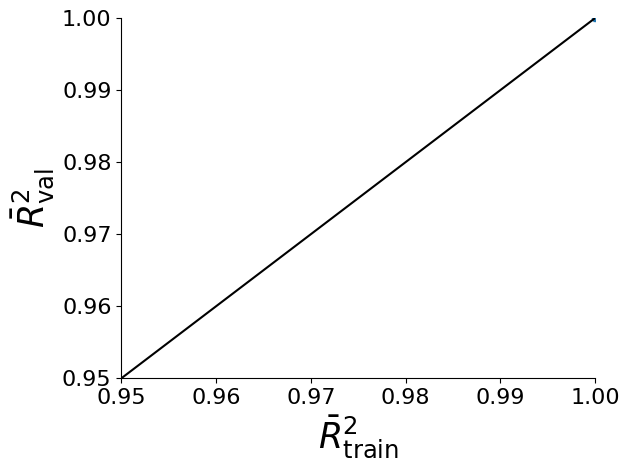

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0.6, 1.], [0.6, 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim(0.95,1)
ax.set_ylim(0.95,1)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

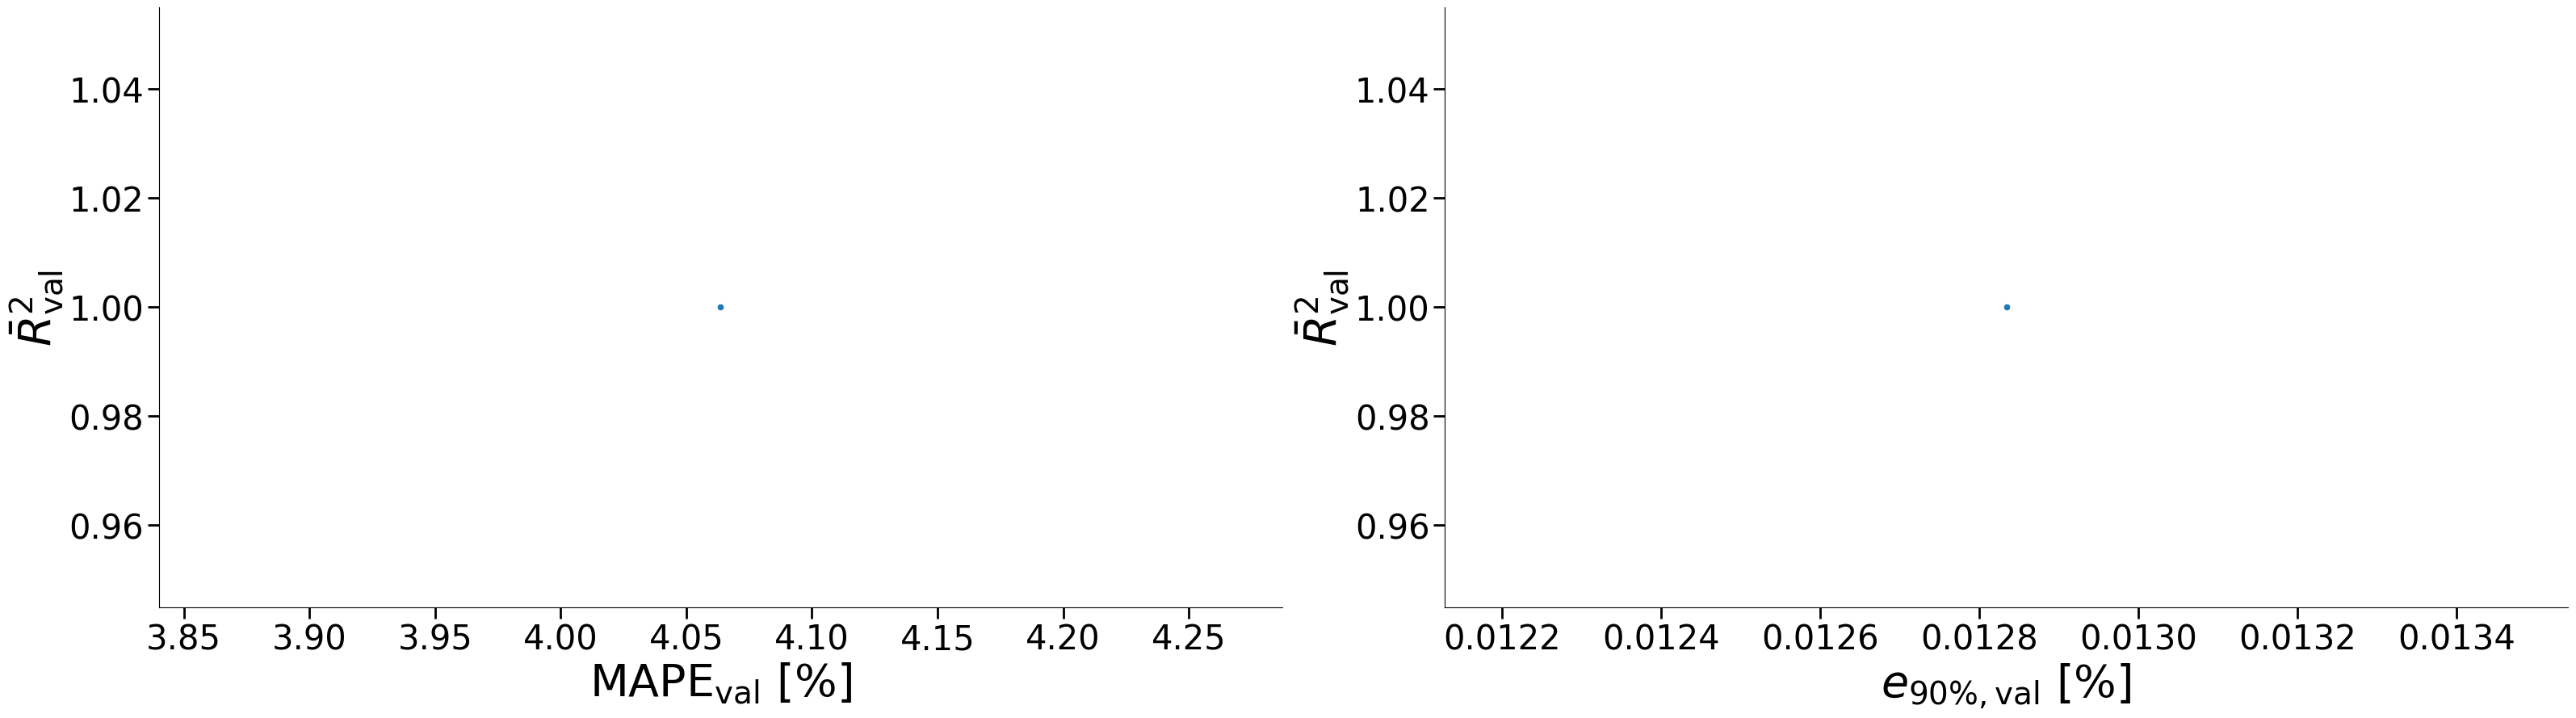

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
#sns.scatterplot(data=df, x='MAPE_sklearn_val', y=r2_val, ax=ax)
sns.scatterplot(data=df, x='MAPE_val', y=r2_val, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
#sns.scatterplot(data=df, x='MAE_sklearn_val', y=r2_val, ax=ax)
sns.scatterplot(data=df, x='MAE_val', y=r2_val, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

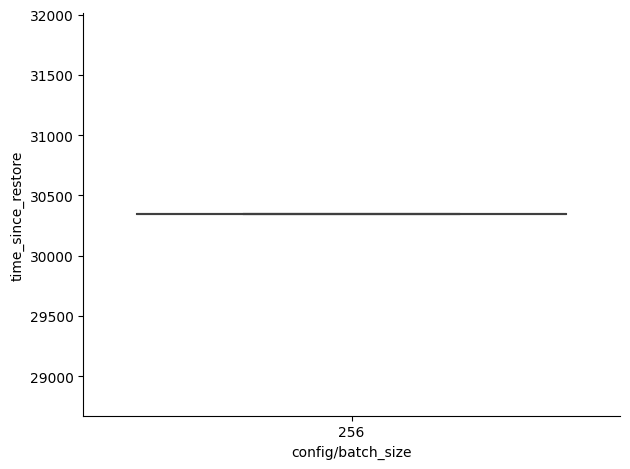

In [15]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [16]:
y_lim = [0.995, 1.005]
#y_lim = [0., 1.]

In [17]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [18]:
to_plot = df[config_columns + [r2_val]].rename(columns=config_column_labels)

In [19]:
to_plot_ow =to_plot.copy()

In [20]:
to_plot_ow

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      4     100         0.0001  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  
0    106    0.001  0.999955

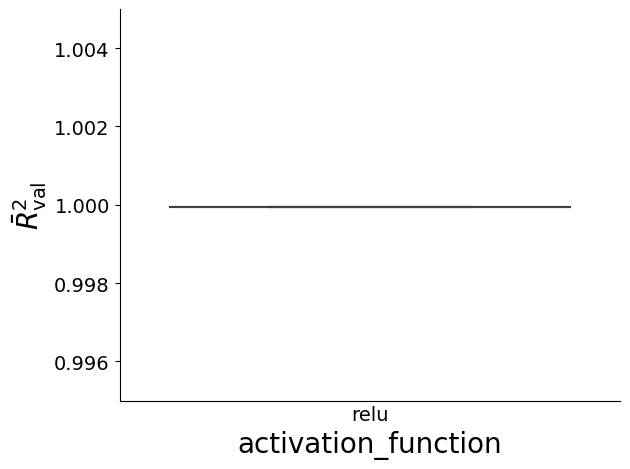

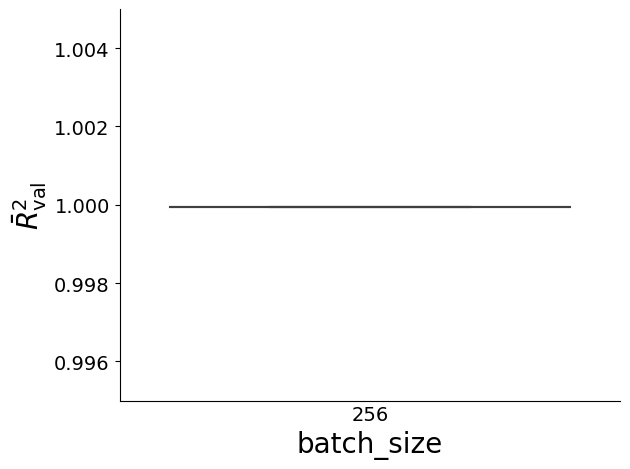

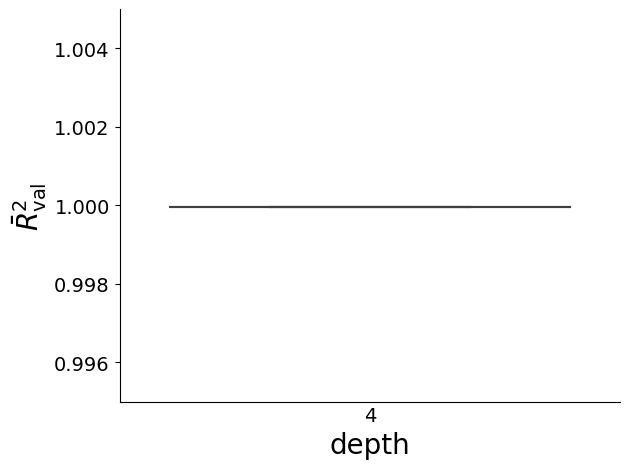

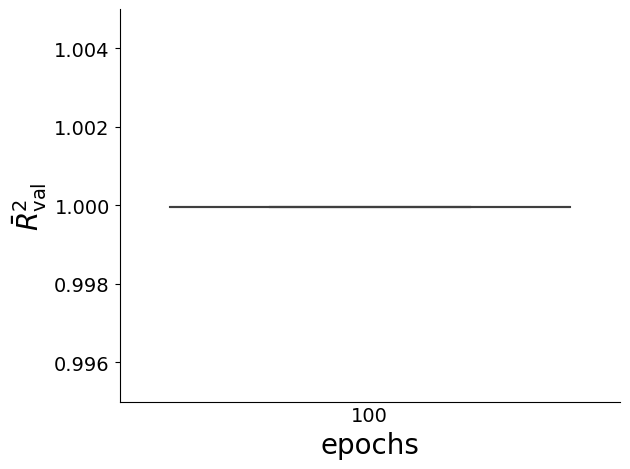

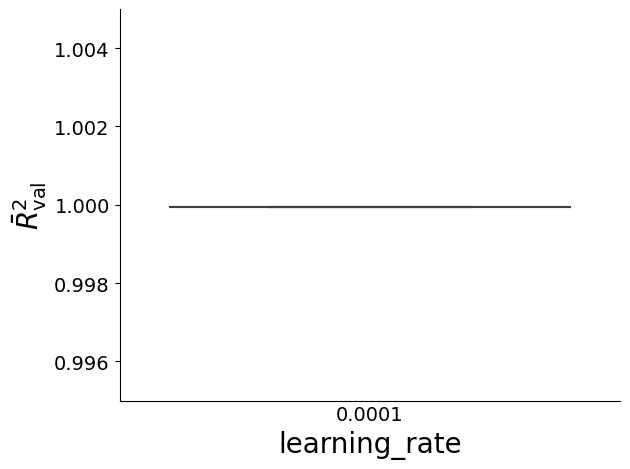

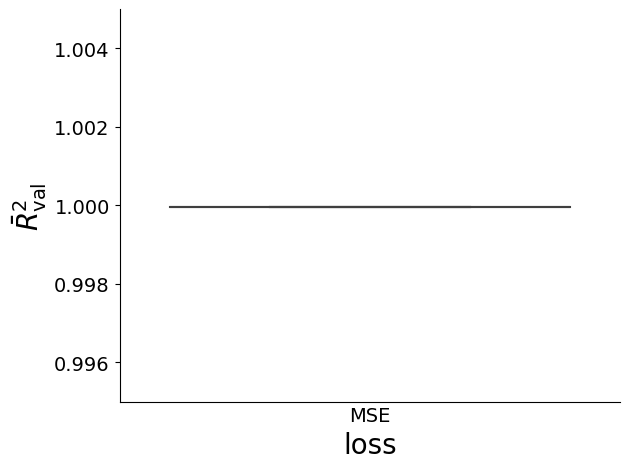

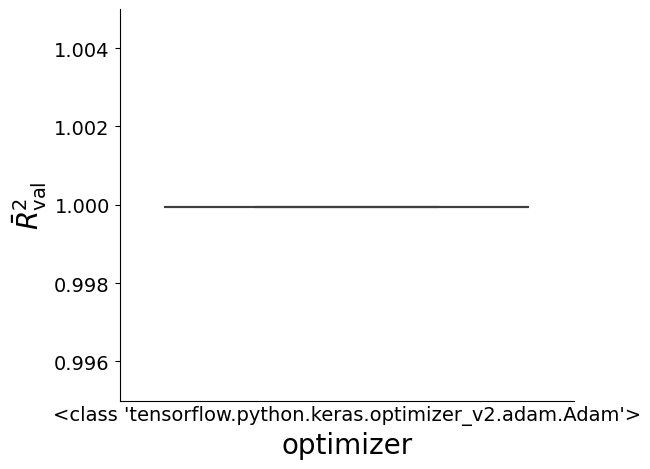

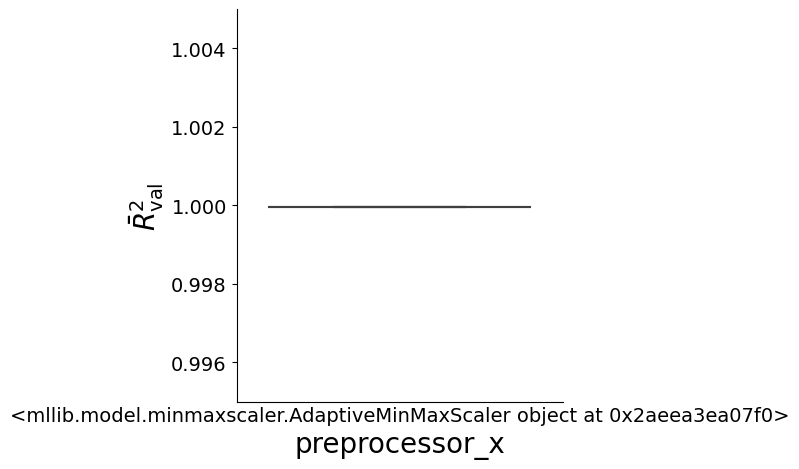

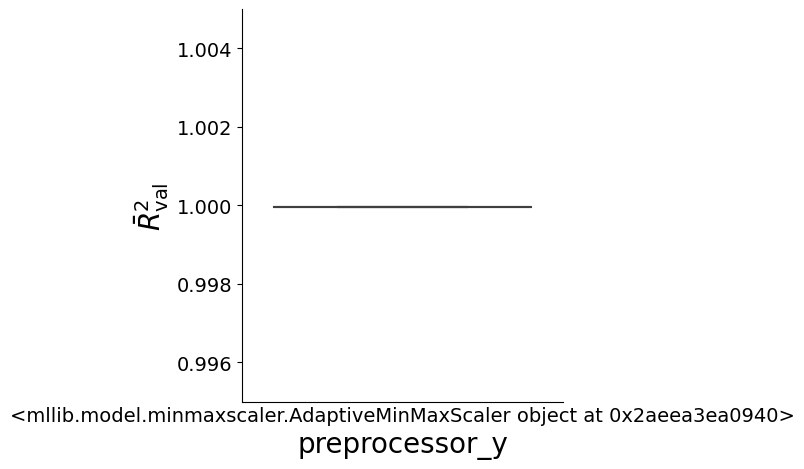

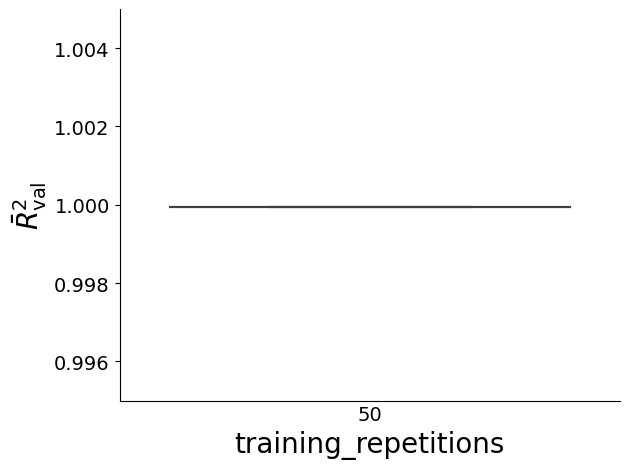

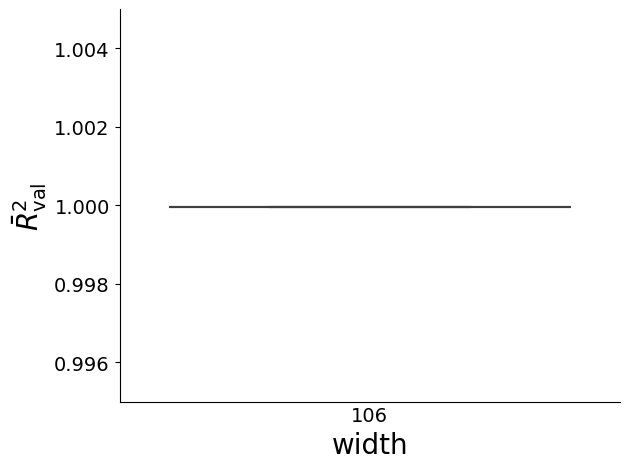

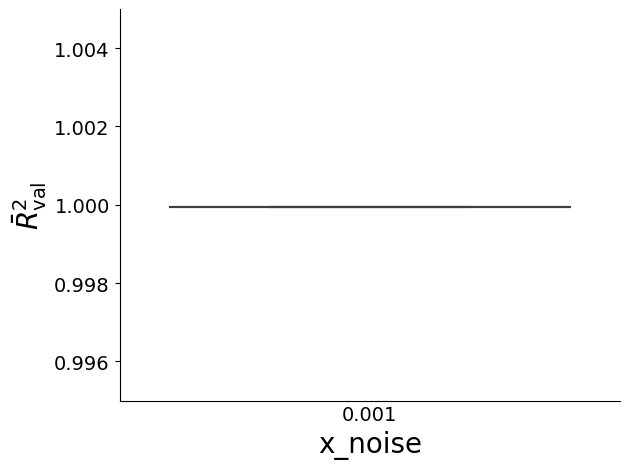

In [21]:
for param in to_plot.columns:
    if param == r2_val:
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y=r2_val, color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [22]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [23]:
df[config_columns + [r2_val]]

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                       relu                256             4            100   

   config/learning_rate config/loss  \
0                0.0001         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise    r2_val  
0                           50           106           0.001  0.999955

In [24]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [25]:
len(config_columns)

12

In [26]:
len(config_column_labels)

12

In [27]:
to_plot = df[config_columns + [r2_val]].copy()
to_plot[r2_val], bins = pd.cut(df[r2_val], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot[r2_val] = pd.cut(df[r2_val], 5, retbins=False, labels=mean_points)

In [28]:
to_plot[r2_val]


/data/user/boiger_r/python_env/aerosol_mieNN/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0    0.999955
Name: r2_val, dtype: category
Categories (5, float64): [0.999155 < 0.999555 < 0.999955 < 1.000355 < 1.000755]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


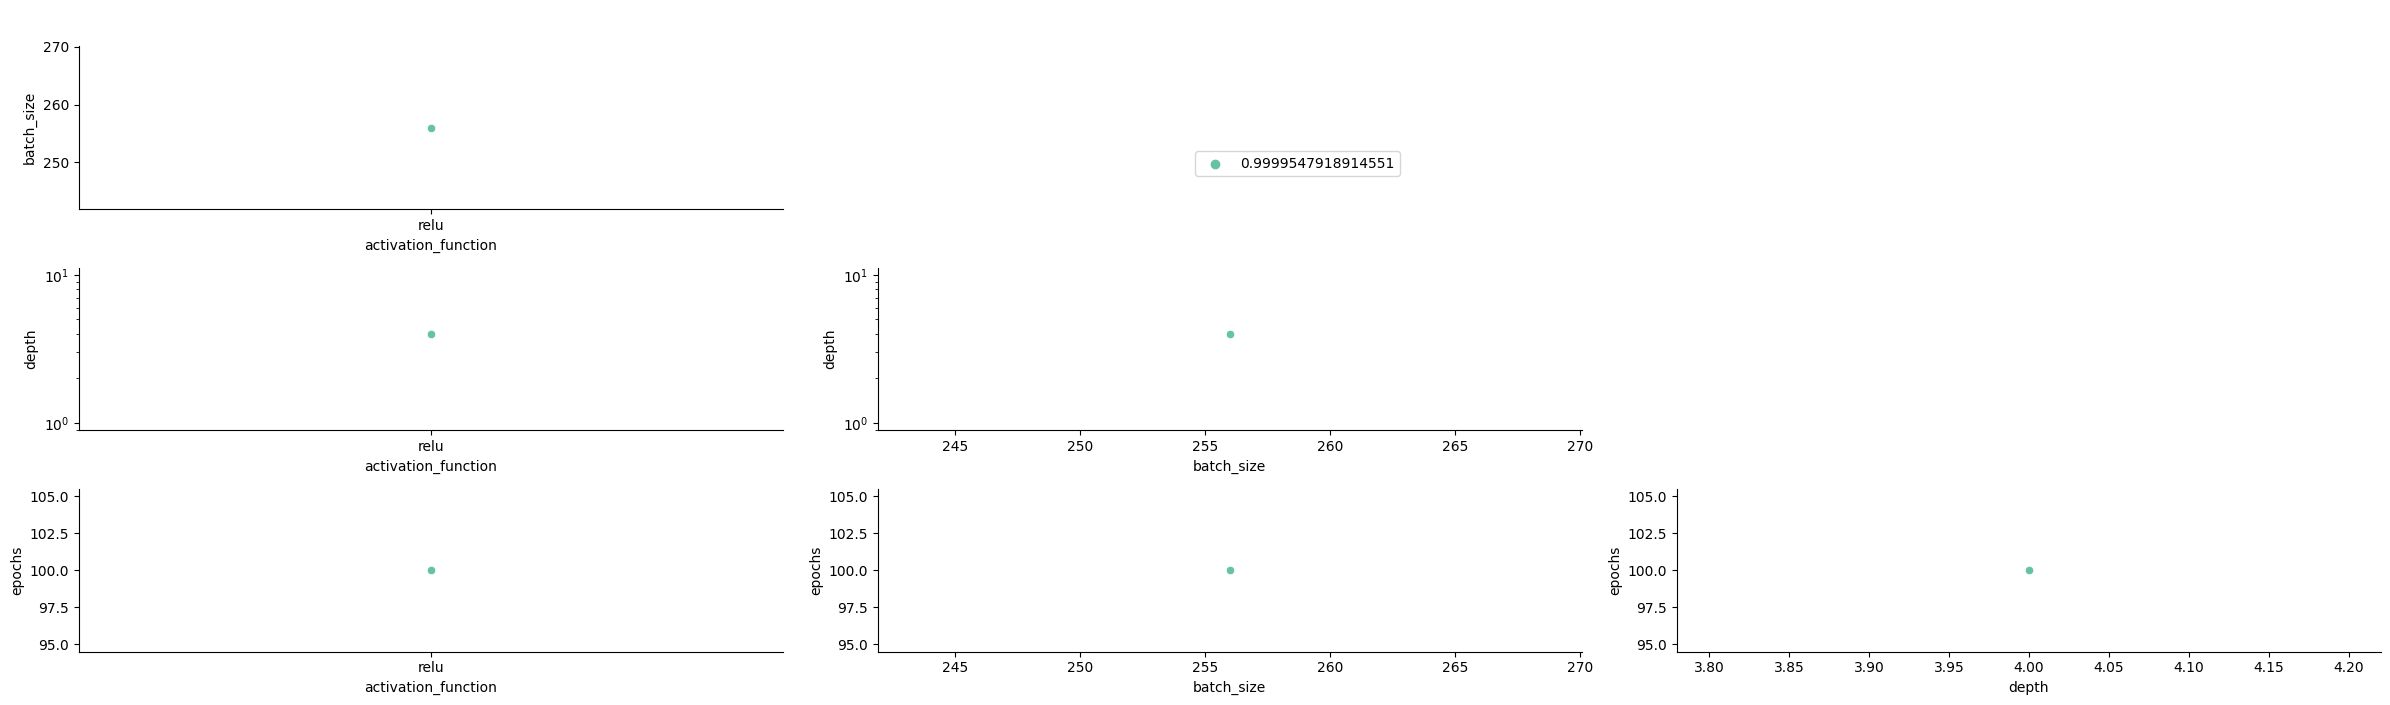

In [29]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot[r2_val].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot[r2_val].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [30]:
best_config = df.sort_values(r2_val, ascending=False).iloc[0, :]

In [31]:
df.sort_values(r2_val, ascending=False)[config_columns + [r2_val,r2_train]].rename(columns=config_column_labels).head(20)#,'r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val','r2_val']].rename(columns=config_column_labels).head(20)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      4     100         0.0001  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  r2_train  
0    106    0.001  0.999955  0.999958

In [32]:
best_config.name

0

In [33]:
best_config['trial_id']

'47e2f_00000'

# Worst configs

In [34]:
df.sort_values(r2_val, ascending=True)[config_columns + [r2_val, r2_train]].rename(columns=config_column_labels).head(5)# ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      4     100         0.0001  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  r2_train  
0    106    0.001  0.999955  0.999958

In [35]:
df

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train  MSE_val  \
0   0.012777  0.012834    9.134486  4.063574   0.000346  0.00037   

   median_percentile_max_error_train  median_percentile_max_error_val  \
0                           2.597325                         2.688677   

   90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                     181.092551                   183.721726  ...   

   config/epochs  config/learning_rate  config/loss  \
0            100                0.0001          MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise  \
0                           50           106           0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

# Copy the best model to the models directory

In [36]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'
best_model_dir = f'{best_config["logdir"]}'

In [37]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11/models'

In [38]:
shutil.copytree(best_model_dir, f'{model_dir}/forward_model')

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11/models/forward_model'

In [39]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11/models'

# Closer look w. r. t. overfitting

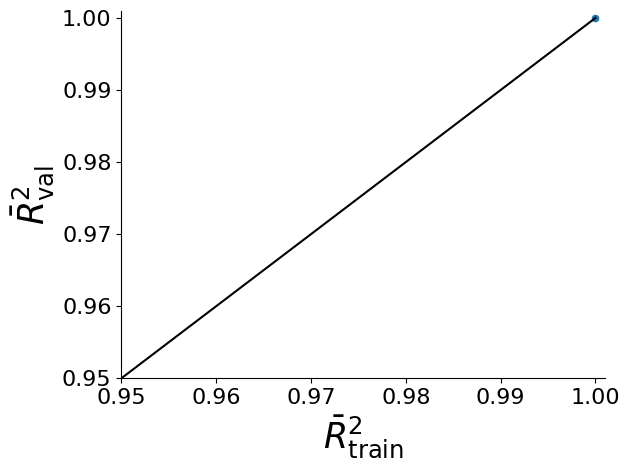

In [40]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.95, 1.001])
ax.set_ylim([0.95, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [41]:
df[df[r2_train] > 0.95]

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train  MSE_val  \
0   0.012777  0.012834    9.134486  4.063574   0.000346  0.00037   

   median_percentile_max_error_train  median_percentile_max_error_val  \
0                           2.597325                         2.688677   

   90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                     181.092551                   183.721726  ...   

   config/epochs  config/learning_rate  config/loss  \
0            100                0.0001          MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise  \
0                           50           106           0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

In [42]:
# LOad history of best config

In [43]:
best_model_folder = best_config['trial_id']

In [44]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11'

In [45]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [46]:
best_model_hist

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.025277  0.025182   22.917342  9.148367   0.002123  0.002105   
1    0.022909  0.022888    9.789433  8.357849   0.001560  0.001552   
2    0.018878  0.018775   14.457795  7.188624   0.001201  0.001188   
3    0.017075  0.017024   11.100185  6.394355   0.001043  0.001040   
4    0.017050  0.016983   11.700681  6.569186   0.000966  0.000963   
5    0.015342  0.015297   11.978968  5.732599   0.000866  0.000868   
6    0.017034  0.016971   11.453056  6.287159   0.000892  0.000896   
7    0.017223  0.017204    8.572236  6.029612   0.000851  0.000855   
8    0.016286  0.016271    9.457420  5.756421   0.000791  0.000795   
9    0.014177  0.014169   10.204079  5.042885   0.000684  0.000689   
10   0.014626  0.014615    7.586158  5.144066   0.000665  0.000673   
11   0.014616  0.014610    6.611112  5.216313   0.000643  0.000651   
12   0.013992  0.014005    8.151261  4.909424   0.000612  0.000620   
13   0.013228  0.013231    7.483414  4.975000   0.000571  0.000578   
14   0.013022  0.013031    6.826473  5.011902   0.000556  0.000564   
15   0.015320  0.015337    7.278790  5.575447   0.000620  0.000627   
16   0.013026  0.013055    6.869287  4.829027   0.000534  0.000542   
17   0.013059  0.013086    7.398416  4.923359   0.000529  0.000538   
18   0.013924  0.013927    6.605878  5.011276   0.000557  0.000565   
19   0.011505  0.011533    9.415320  4.110722   0.000458  0.000468   
20   0.012409  0.012449    7.975061  4.293419   0.000470  0.000482   
21   0.017926  0.017963    9.398831  6.160760   0.000667  0.000680   
22   0.010742  0.010791    9.630008  3.793391   0.000410  0.000424   
23   0.010749  0.010780    9.044292  3.761202   0.000408  0.000422   
24   0.010587  0.010623   10.759316  3.864772   0.000398  0.000412   
25   0.011468  0.011519    9.165142  4.141614   0.000423  0.000438   
26   0.011407  0.011451   10.468738  3.997238   0.000405  0.000420   
27   0.010033  0.010098    9.781964  3.503965   0.000363  0.000379   
28   0.009996  0.010053    5.550432  3.448943   0.000358  0.000376   
29   0.009823  0.009883    5.905969  3.438261   0.000346  0.000364   
30   0.009599  0.009658    4.835531  3.422148   0.000337  0.000354   
31   0.010059  0.010123    8.905211  3.511864   0.000350  0.000368   
32   0.010128  0.010192    6.970245  3.420218   0.000337  0.000357   
33   0.011813  0.011879   15.189167  4.015985   0.000383  0.000401   
34   0.010030  0.010086   12.192548  3.351252   0.000328  0.000347   
35   0.010281  0.010352   13.973961  3.509488   0.000329  0.000348   
36   0.009554  0.009627   10.197239  3.205825   0.000310  0.000328   
37   0.010134  0.010206   14.914612  3.460574   0.000317  0.000336   
38   0.011480  0.011544   12.842054  3.926294   0.000346  0.000364   
39   0.009768  0.009822   12.082403  3.382639   0.000302  0.000322   
40   0.010017  0.010073    9.852281  3.435649   0.000304  0.000324   
41   0.010056  0.010116    4.885948  3.292939   0.000303  0.000323   
42   0.008736  0.008819    9.887492  2.878258   0.000270  0.000292   
43   0.009565  0.009634    5.299700  3.186453   0.000283  0.000304   
44   0.009307  0.009374    7.285969  3.127115   0.000277  0.000299   
45   0.010331  0.010398   11.398418  3.545065   0.000310  0.000332   
46   0.011572  0.011650   11.502115  3.850258   0.000328  0.000351   
47   0.009196  0.009269    7.690133  3.083086   0.000273  0.000298   
48   0.009065  0.009148    5.021558  2.981513   0.000259  0.000284   
49   0.012777  0.012834    9.134486  4.063574   0.000346  0.000370   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            6.071674                         6.193218   
1                            5.531277                         5.659267   
2                            4.538308                         4.658685   
3                            4.167471                         4.275212   
4                            4.026418                         4

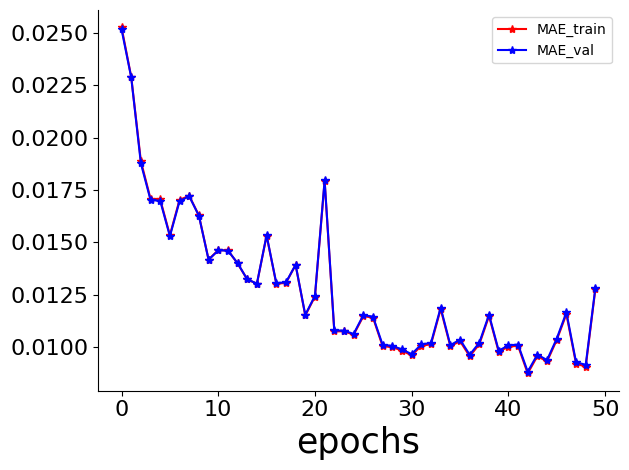

In [47]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [48]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

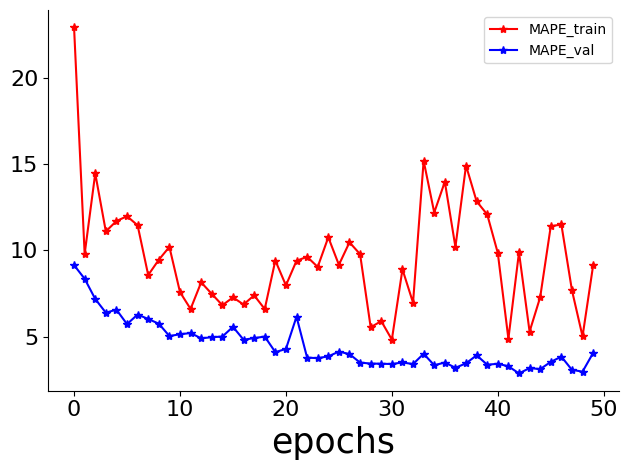

In [49]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

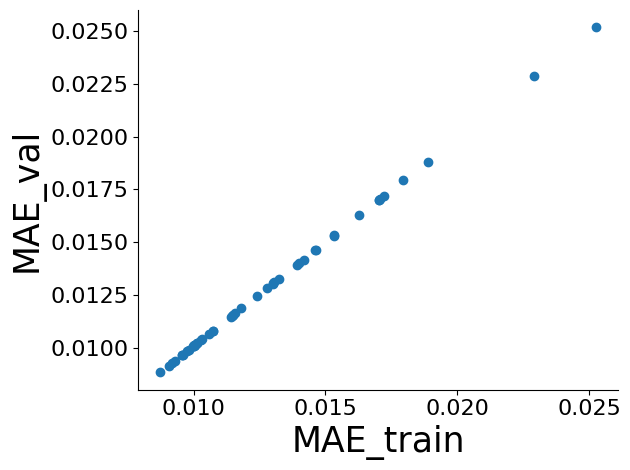

In [50]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

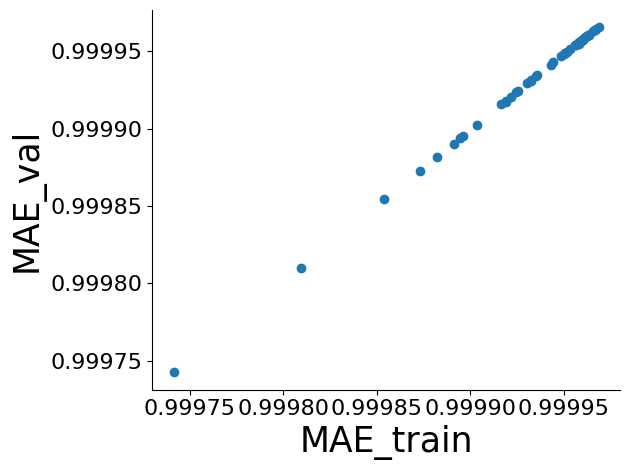

In [51]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [52]:
to_plot

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                       relu                256             4            100   

   config/learning_rate config/loss  \
0                0.0001         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise    r2_val  
0                           50           106           0.001  0.999955

In [53]:
to_plot_ow.columns

Index(['activation_function', 'batch_size', 'depth', 'epochs', 'learning_rate',
       'loss', 'optimizer', 'preprocessor_x', 'preprocessor_y',
       'training_repetitions', 'width', 'x_noise', 'r2_val'],
      dtype='object')

In [54]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11/models'

# create overview plot

In [55]:
best_config['config/datafile']

'/data/project/general/aerosolretriev/aerosol_data/dataset_12_2022/preprocessed_new/data_all_train_iv5_F11.h5'

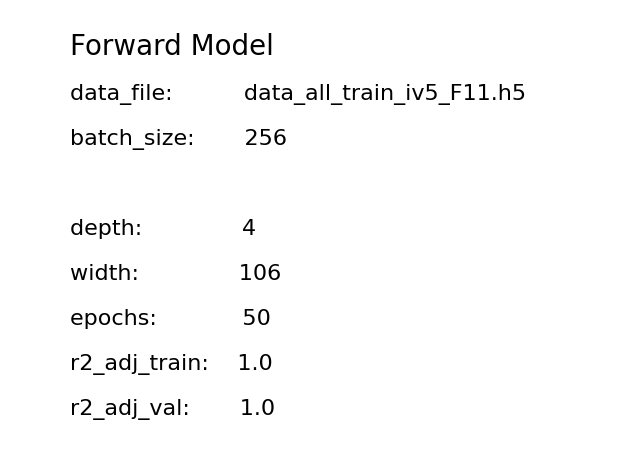

In [56]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Forward Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='data_file:          ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='batch_size:       ' +str(best_config['config/batch_size']),fontsize=16)
#ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:  '+str(best_config['config/lr']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='depth:              '+str(best_config['config/depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='width:              '+str(best_config['config/width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:            '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:       '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

1 0
1 1
1 2
2 0


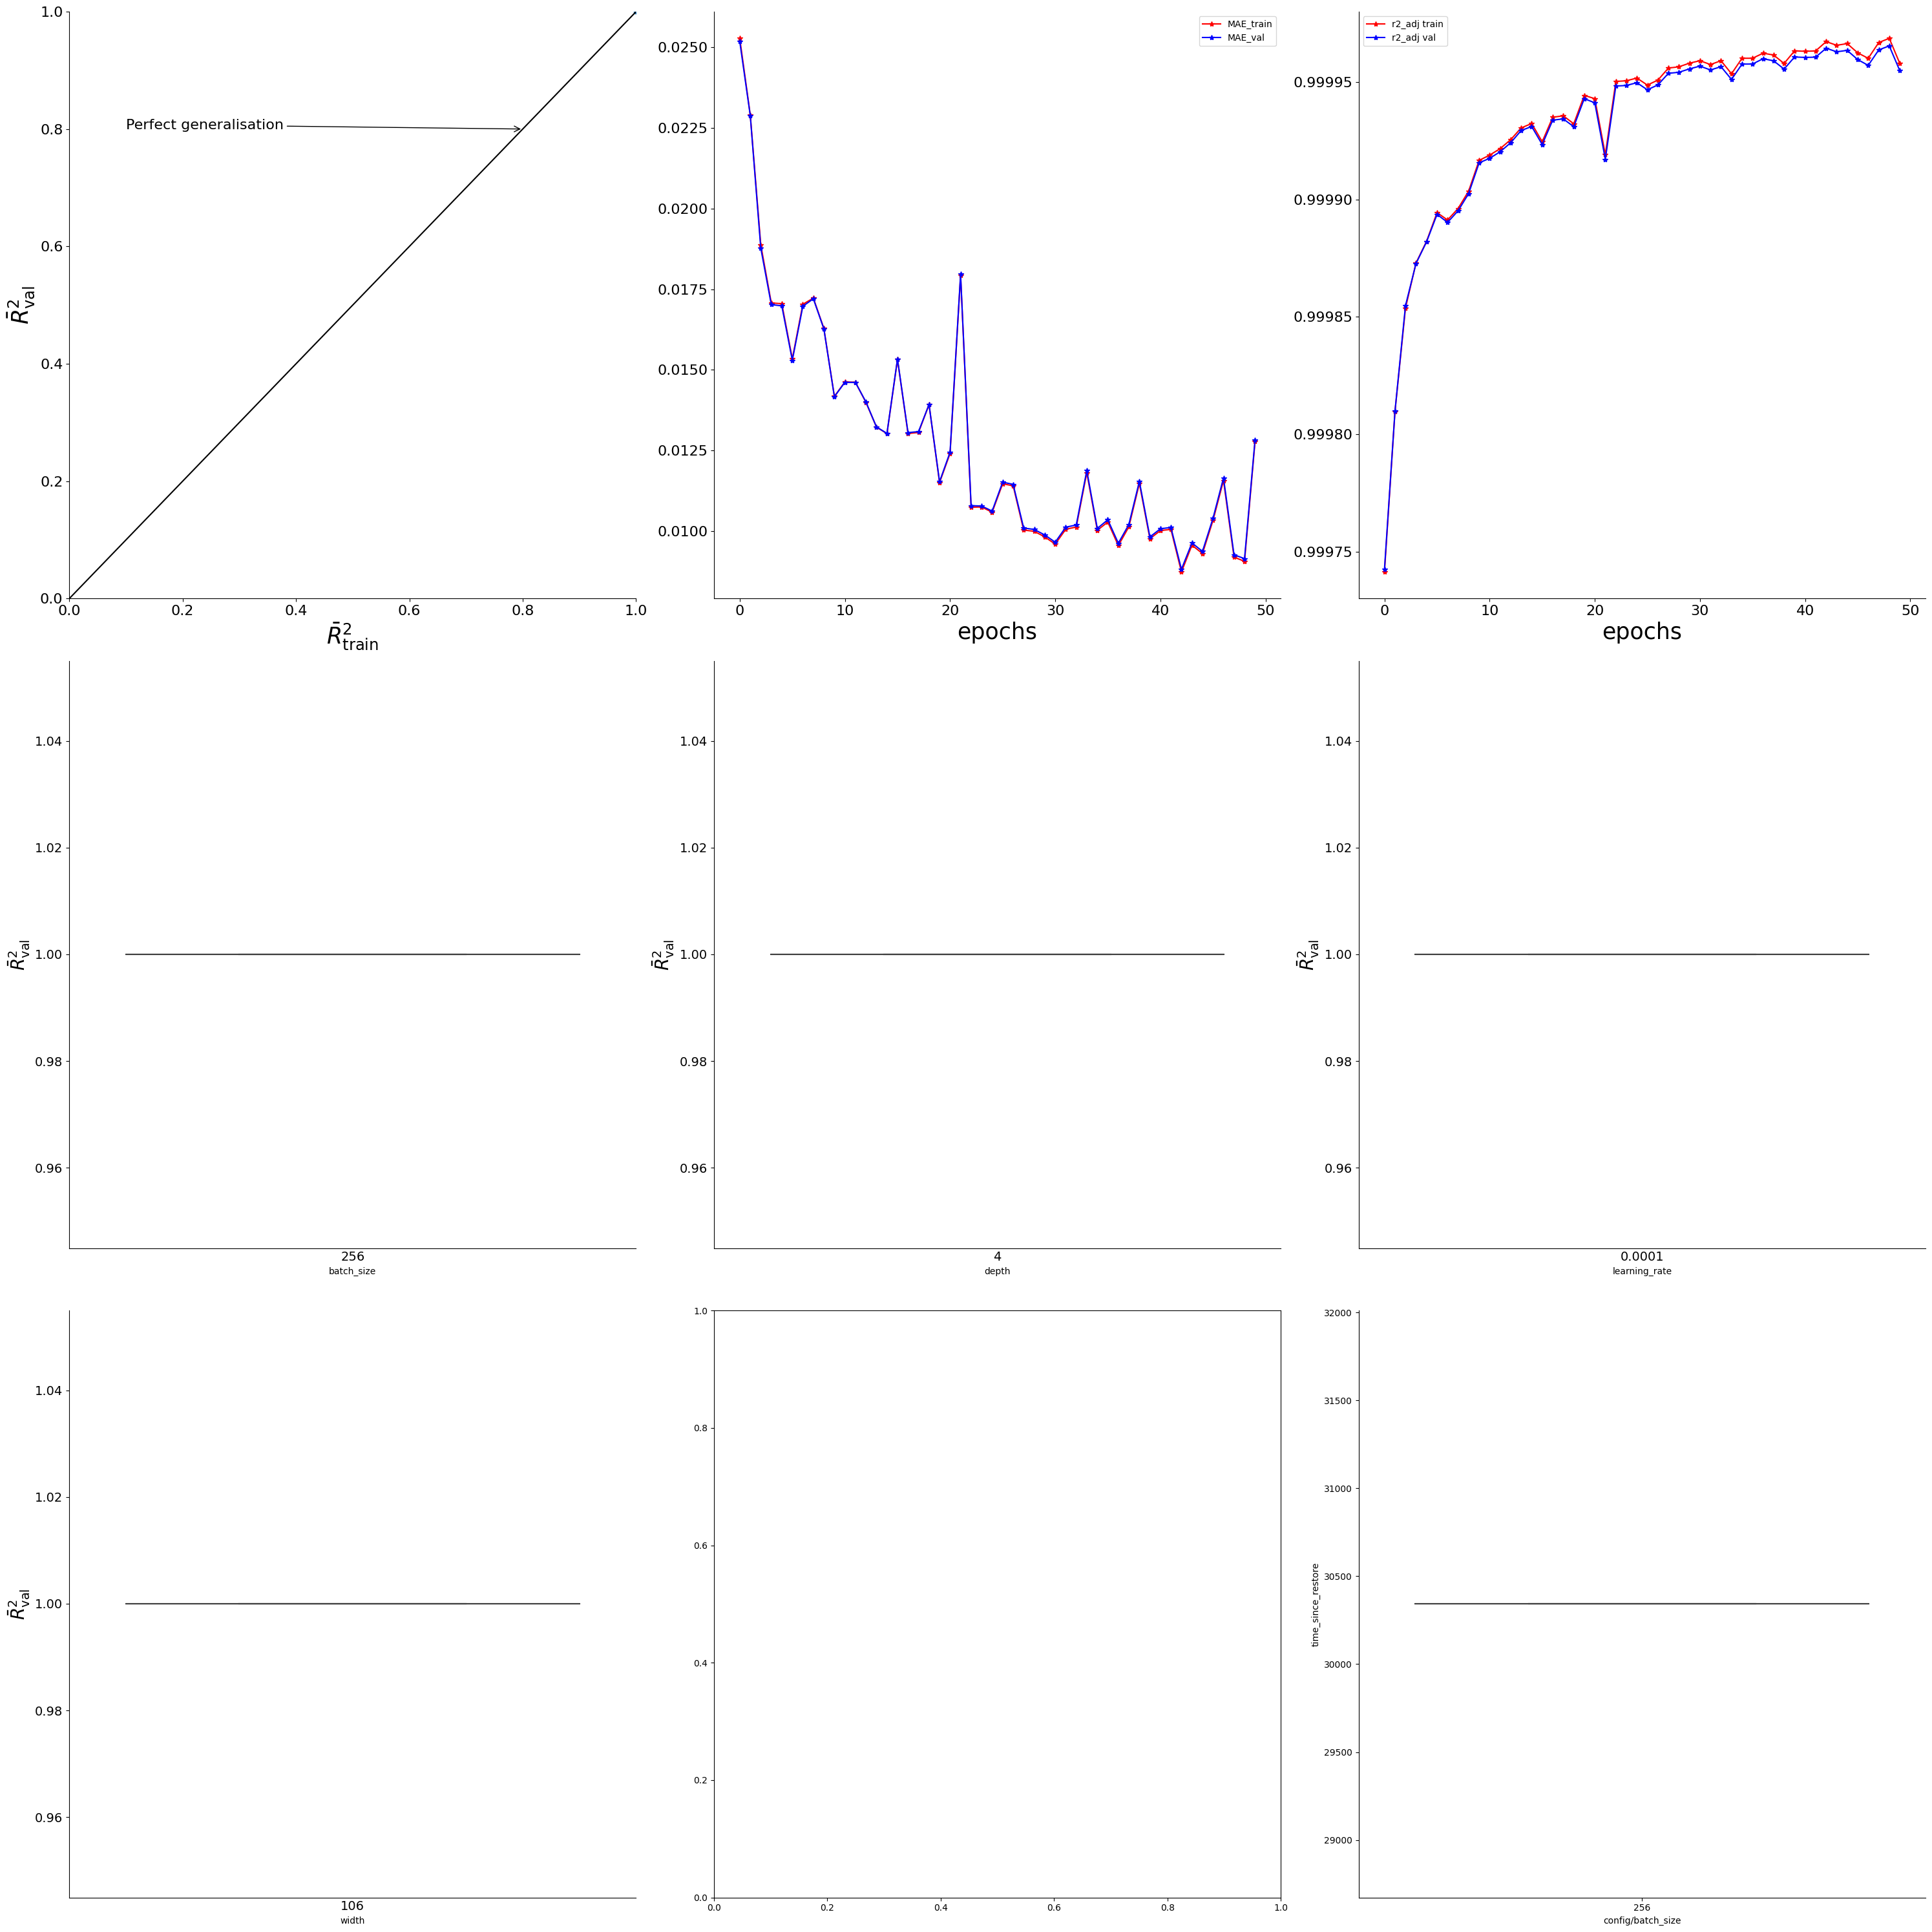

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'depth', 'learning_rate', 'width']

for param in plot_columns_list:
    if param == 'r2_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_val',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
 #   ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

# Save configurations of best model

In [58]:
best_config_df = pd.DataFrame(best_config)

In [59]:
best_config_df = best_config_df.T
best_config_df

MAE_train   MAE_val MAPE_train  MAPE_val MSE_train  MSE_val  \
0  0.012777  0.012834   9.134486  4.063574  0.000346  0.00037   

  median_percentile_max_error_train median_percentile_max_error_val  \
0                          2.597325                        2.688677   

  90_percentile_max_error_train 90_percentile_max_error_val  ...  \
0                    181.092551                  183.721726  ...   

  config/epochs config/learning_rate config/loss  \
0           100               0.0001         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

  config/training_repetitions config/width config/x_noise  \
0                          50          106          0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

In [60]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

In [61]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

In [62]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_Romana/results_29_12_2022/forward_models_iv5_F11/models'

In [63]:
best_config_df['config/datafile'].values

array(['/data/project/general/aerosolretriev/aerosol_data/dataset_12_2022/preprocessed_new/data_all_train_iv5_F11.h5'],
      dtype=object)